# Comparison of (Extended) Isolation Forest among various implementations
## Imlementations by H2O.AI, Sklearn and original paper

* IF = Isolation Forest
* EIF = Extended Isolation Forest
* Ex0 = extension_level parameter = 0. It means that Extended Isolation Forest behave like Isolation Forest
* Ex1 = extension_level parameter = 1.

In [1]:
import sys
sys.path.append("../../../h2o-py/build/main") # path to h2o build
sys.path.append("eif") # path to eif_old.py file (git clone https://github.com/sahandha/eif.git)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import eif_old as iso
import h2o
from h2o.estimators import H2OIsolationForestEstimator
from h2o.estimators import H2OExtendedIsolationForestEstimator
from sklearn.ensemble import IsolationForest

../../../h2o-py/build/main\h2o\frame.py:2914: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if by is not None or group_by_frame is not "_":


versionFromGradle='3.32.0',projectVersion='3.32.0.99999',branch='valenad-PUBDEV-7138-extended-isolation-forest',lastCommitHash='91952df2d005b53268a2412406903b662d1dbc3a',gitDescribe='jenkins-3.32.0.3-171-g91952df2d0-dirty',compiledOn='2021-02-06 02:31:58',compiledBy='valen'


../../../h2o-py/build/main\h2o\automl\autoh2o.py:187: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  assert nfolds is not 1, "nfolds set to " + str(nfolds) + "; nfolds = 1 is an invalid value. Use nfolds >=2 if you want cross-valiated metrics and Stacked Ensembles or use nfolds = 0 to disable."


#### Note:
This notebook use old implementation of Extended Isolation Forest. The newest implementation is not working yet. Issue opened: https://github.com/sahandha/eif/issues/14

It should not affect the results.

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.
versionFromGradle='3.32.0',projectVersion='3.32.0.99999',branch='valenad-PUBDEV-7138-extended-isolation-forest',lastCommitHash='91952df2d005b53268a2412406903b662d1dbc3a',gitDescribe='jenkins-3.32.0.3-171-g91952df2d0-dirty',compiledOn='2021-02-06 02:31:58',compiledBy='valen'


H2O_cluster_uptime:,19 secs
H2O_cluster_timezone:,Europe/Prague
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.99999
H2O_cluster_version_age:,12 minutes
H2O_cluster_name:,valen
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.041 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [32]:
airlines= h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/airlines/allyears2k_headers.zip")
predictors = ["Origin", "Dest", "Year", "UniqueCarrier",
              "DayOfWeek", "Month", "Distance", "FlightNum"]
eif_w_seed = H2OExtendedIsolationForestEstimator(seed = 1234) 
eif_w_seed.train(x = predictors,
                       training_frame = airlines)
eif_wo_seed = H2OExtendedIsolationForestEstimator()
eif_wo_seed.train(x = predictors,
                        training_frame = airlines)
print(eif_w_seed)
print(eif_wo_seed)

Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
Model Details
H2OExtendedIsolationForestEstimator :  Extended Isolation Forest
Model Key:  ExtendedIsolationForest_model_python_1612572874375_24


Model Summary: 


,,number_of_trees,size_of_subsample,extension_level
0,,100.0,256.0,0.0




Model Details
H2OExtendedIsolationForestEstimator :  Extended Isolation Forest
Model Key:  ExtendedIsolationForest_model_python_1612572874375_25


Model Summary: 


,,number_of_trees,size_of_subsample,extension_level
0,,100.0,256.0,0.0


In [35]:
titanic = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/gbm_test/titanic.csv")
predictors = titanic.columns
tree_num = [20, 50, 80, 110, 140, 170, 200]
label = ["20", "50", "80", "110", "140", "170", "200"]
for key, num in enumerate(tree_num):
    titanic_eif = H2OExtendedIsolationForestEstimator(ntrees = num,
                                                      seed = 1234, extension_level = titanic.dim[1] - 1)
    titanic_eif.train(x = predictors,
                     training_frame = titanic) 
    print(label[key], 'training score', titanic_eif.mse(train = True))

Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
20 training score None
extendedisolationforest Model Build progress: |███████████████████████████| 100%
50 training score None
extendedisolationforest Model Build progress: |███████████████████████████| 100%
80 training score None
extendedisolationforest Model Build progress: |███████████████████████████| 100%
110 training score None
extendedisolationforest Model Build progress: |███████████████████████████| 100%
140 training score None
extendedisolationforest Model Build progress: |███████████████████████████| 100%
170 training score None
extendedisolationforest Model Build progress: |███████████████████████████| 100%
200 training score None


In [19]:
print(extisofor_wo_seed)

Model Details
H2OExtendedIsolationForestEstimator :  Extended Isolation Forest
Model Key:  ExtendedIsolationForest_model_python_1612572874375_13


Model Summary: 


,,number_of_trees,size_of_subsample,extension_level
0,,100.0,256.0,0.0


In [20]:
cars = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/junit/cars_20mpg.csv")
predictors = ["displacement","power","weight","acceleration","year"]
cars_if = H2OIsolationForestEstimator(seed=1234)
cars_if.train(x=predictors,
               training_frame=cars)
print(cars_if)

Parse progress: |█████████████████████████████████████████████████████████| 100%


../../../h2o-py/build/main\h2o\estimators\estimator_base.py:200: RuntimeWarning: Stopping tolerance is ignored for _stopping_rounds=0.
  warnings.warn(mesg["message"], RuntimeWarning)


isolationforest Model Build progress: |███████████████████████████████████| 100%
Model Details
H2OIsolationForestEstimator :  Isolation Forest
Model Key:  IsolationForest_model_python_1612572874375_16


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,32553.0,5.0,8.0,7.94,15.0,72.0,47.3




ModelMetricsAnomaly: isolationforest
** Reported on train data. **

Anomaly Score: 5.798140075559026
Normalized Anomaly Score: 0.28978903298475606

Scoring History: 


,,timestamp,duration,number_of_trees,mean_tree_path_length,mean_anomaly_score
0,,2021-02-06 02:03:02,0.000 sec,0.0,NaN,NaN
1,,2021-02-06 02:03:02,0.000 sec,1.0,6.374150,0.104308
2,,2021-02-06 02:03:02,0.010 sec,2.0,6.474026,0.087662
3,,2021-02-06 02:03:02,0.010 sec,3.0,6.078231,0.172832
4,,2021-02-06 02:03:02,0.010 sec,4.0,6.119822,0.195595
5,,2021-02-06 02:03:02,0.020 sec,5.0,6.238095,0.173160
6,,2021-02-06 02:03:02,0.020 sec,6.0,6.274383,0.181404
7,,2021-02-06 02:03:02,0.020 sec,7.0,6.336684,0.165829
8,,2021-02-06 02:03:02,0.020 sec,8.0,6.237173,0.203421
9,,2021-02-06 02:03:02,0.020 sec,9.0,6.227551,0.231735



See the whole table with table.as_data_frame()



In [23]:
train = h2o.import_file("http://s3.amazonaws.com/h2o-public-test-data/smalldata/anomaly/ecg_discord_train.csv")
test = h2o.import_file("http://s3.amazonaws.com/h2o-public-test-data/smalldata/anomaly/ecg_discord_test.csv")
isofor_model = H2OIsolationForestEstimator(sample_size=5,
                                            ntrees=7)
isofor_model.train(training_frame=train)
isofor_model.model_performance()
isofor_model.model_performance(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
isolationforest Model Build progress: |███████████████████████████████████| 100%

ModelMetricsAnomaly: isolationforest
** Reported on test data. **



AttributeError: type object 'MetricsBase' has no attribute 'mean_score'

In [25]:
train = h2o.import_file("http://s3.amazonaws.com/h2o-public-test-data/smalldata/anomaly/ecg_discord_train.csv")
test = h2o.import_file("http://s3.amazonaws.com/h2o-public-test-data/smalldata/anomaly/ecg_discord_test.csv")
extisofor_model = H2OExtendedIsolationForestEstimator(sample_size = 5,
                                                      ntrees=7)
extisofor_model.train(training_frame = train)
extisofor_model.model_performance()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%


### Train models

In [46]:
cars = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/junit/cars_20mpg.csv")
predictors = ["displacement","power","weight","acceleration","year"]
cars_eif = H2OExtendedIsolationForestEstimator(max_runtime_secs = 1,
                                               ntrees = 10000,
                                               seed = 1234)
cars_eif.train(x = predictors,
              training_frame = cars)
cars_eif.model_performance()

Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |████████████████████████████| 100%


In [7]:
cars = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/junit/cars_20mpg.csv")
predictors = ["displacement","power","weight","acceleration","year"]
cars["const_1"] = 6
cars["const_2"] = 7
train, valid = cars.split_frame(ratios = [.8], seed = 1234)
cars_eif = H2OExtendedIsolationForestEstimator(seed = 1234,
                                               ignore_const_cols = False)
cars_eif.train(x = predictors,
              training_frame = cars)
cars

Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%


name,economy,cylinders,displacement,power,weight,acceleration,year,economy_20mpg,const_1,const_2
AMC Ambassador Brougham,13,8,360,175,3821,11,73,0,6,7
AMC Ambassador DPL,15,8,390,190,3850,8.5,70,0,6,7
AMC Ambassador SST,17,8,304,150,3672,11.5,72,0,6,7
AMC Concord DL 6,20.2,6,232,90,3265,18.2,79,1,6,7
AMC Concord DL,18.1,6,258,120,3410,15.1,78,0,6,7
AMC Concord DL,23,4,151,nan,3035,20.5,82,1,6,7
AMC Concord,19.4,6,232,90,3210,17.2,78,0,6,7
AMC Concord,24.3,4,151,90,3003,20.1,80,1,6,7
AMC Gremlin,18,6,232,100,2789,15,73,0,6,7
AMC Gremlin,19,6,232,100,2634,13,71,0,6,7


In [6]:
cars

name,economy,cylinders,displacement,power,weight,acceleration,year,economy_20mpg,const_1,const_2
AMC Ambassador Brougham,13,8,360,175,3821,11,73,0,6,7
AMC Ambassador DPL,15,8,390,190,3850,8.5,70,0,6,7
AMC Ambassador SST,17,8,304,150,3672,11.5,72,0,6,7
AMC Concord DL 6,20.2,6,232,90,3265,18.2,79,1,6,7
AMC Concord DL,18.1,6,258,120,3410,15.1,78,0,6,7
AMC Concord DL,23,4,151,nan,3035,20.5,82,1,6,7
AMC Concord,19.4,6,232,90,3210,17.2,78,0,6,7
AMC Concord,24.3,4,151,90,3003,20.1,80,1,6,7
AMC Gremlin,18,6,232,100,2789,15,73,0,6,7
AMC Gremlin,19,6,232,100,2634,13,71,0,6,7


In [8]:
airlines= h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/airlines/allyears2k_headers.zip")
predictors = ["Origin", "Dest", "Year", "UniqueCarrier",
              "DayOfWeek", "Month", "Distance", "FlightNum"]
encoding = "one_hot_explicit"
airlines_eif = H2OExtendedIsolationForestEstimator(categorical_encoding = encoding,
                                                   seed = 1234)
airlines_eif.train(x = predictors,
                  training_frame = airlines)
airlines_eif

Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
Model Details
H2OExtendedIsolationForestEstimator :  Extended Isolation Forest
Model Key:  ExtendedIsolationForest_model_python_1612575829239_4


Model Summary: 


,,number_of_trees,size_of_subsample,extension_level
0,,100.0,256.0,0.0


### Create data for map

In [48]:
h2o.cluster().shutdown()

H2O session _sid_ac34 closed.


In [8]:
granularity = 30

# Heat map data 
xx, yy = np.meshgrid(np.linspace(-5., 5., granularity), np.linspace(-5., 5, granularity))

# H2O
hf_heatmap = h2o.H2OFrame(np.c_[xx.ravel(), yy.ravel()], column_names = ["x", "y"]) 

# Pandas
df_heatmap = hf_heatmap.as_data_frame(use_pandas=True)

# Numpy
X_heatmap = np.c_[xx.ravel(), yy.ravel()]

# Output - other data formats are similar
df_heatmap.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,x,y
0,-5.000000,-5.0
1,-4.655172,-5.0
2,-4.310345,-5.0
3,-3.965517,-5.0
4,-3.620690,-5.0


### Compute anomaly score
#### Note:
Negative number of H2O mean length will be used and positive value of sklearn anomaly score

In [9]:
# Anomaly score for heatmap data

# H2O IF
h2o_anomaly_score = IF_h2o.predict(hf_heatmap).cbind(hf_heatmap)
h2o_anomaly_score_df = h2o_anomaly_score.as_data_frame(use_pandas=True, header=True)
heatmap_h2o_if = np.array(h2o_anomaly_score_df["predict"]).reshape(xx.shape)
heatmap_h2o_mean_length_if = -1*np.array(h2o_anomaly_score_df["mean_length"]).reshape(xx.shape)

h2o_anomaly_score_df

# H2O EIF -> Ex0
h2o_anomaly_score_eif_if = EIF_h2o_if.predict(hf_heatmap).cbind(hf_heatmap)
h2o_anomaly_score_df_eif_if = h2o_anomaly_score_eif_if.as_data_frame(use_pandas=True, header=True)
heatmap_h2o_eif_if = np.array(h2o_anomaly_score_df_eif_if["anomaly_score"]).reshape(xx.shape)
heatmap_h2o_mean_length_eif_if = -1*np.array(h2o_anomaly_score_df_eif_if["mean_length"]).reshape(xx.shape)

# H2O EIF
h2o_anomaly_score_eif = EIF_h2o.predict(hf_heatmap).cbind(hf_heatmap)
h2o_anomaly_score_df_eif = h2o_anomaly_score_eif.as_data_frame(use_pandas=True, header=True)
heatmap_h2o_eif = np.array(h2o_anomaly_score_df_eif["anomaly_score"]).reshape(xx.shape)
heatmap_h2o_mean_length_eif = -1*np.array(h2o_anomaly_score_df_eif["mean_length"]).reshape(xx.shape)

# Sklearn
sklearn_anomaly_score = abs(IF_sklearn.score_samples(df_heatmap)) # Sklearn gives negative metrict of the same as 
                                                                 # it is in paper
heatmap_sklearn = sklearn_anomaly_score.reshape(xx.shape)
print("Sklearn anomaly scoring done")

# Paper IF
paper_anomaly_score_if = IF_paper.compute_paths(X_heatmap)
heatmap_paper_if = paper_anomaly_score_if.reshape(xx.shape)
print("Paper IF anomaly scoring done")

# Paper EIF
paper_anomaly_score_eif = EIF_paper.compute_paths(X_heatmap)
heatmap_paper_eif = paper_anomaly_score_eif.reshape(xx.shape)
print("Paper EIF anomaly scoring done")

isolationforest prediction progress: |████████████████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
Sklearn anomaly scoring done
Paper IF anomaly scoring done
Paper EIF anomaly scoring done


### Plot anomaly score

* Mean length = Mean path lengt through the forest to separate an observation. 

H2O plot has a white spots because all colorbars are between [0,1] but h2o has inconsistent anomaly score with other implementations. It can be higher than 1 and lower than 0.

Sklear and paper implementation of IF/EIF use anomaly score normalization from the paper. [1] [2]

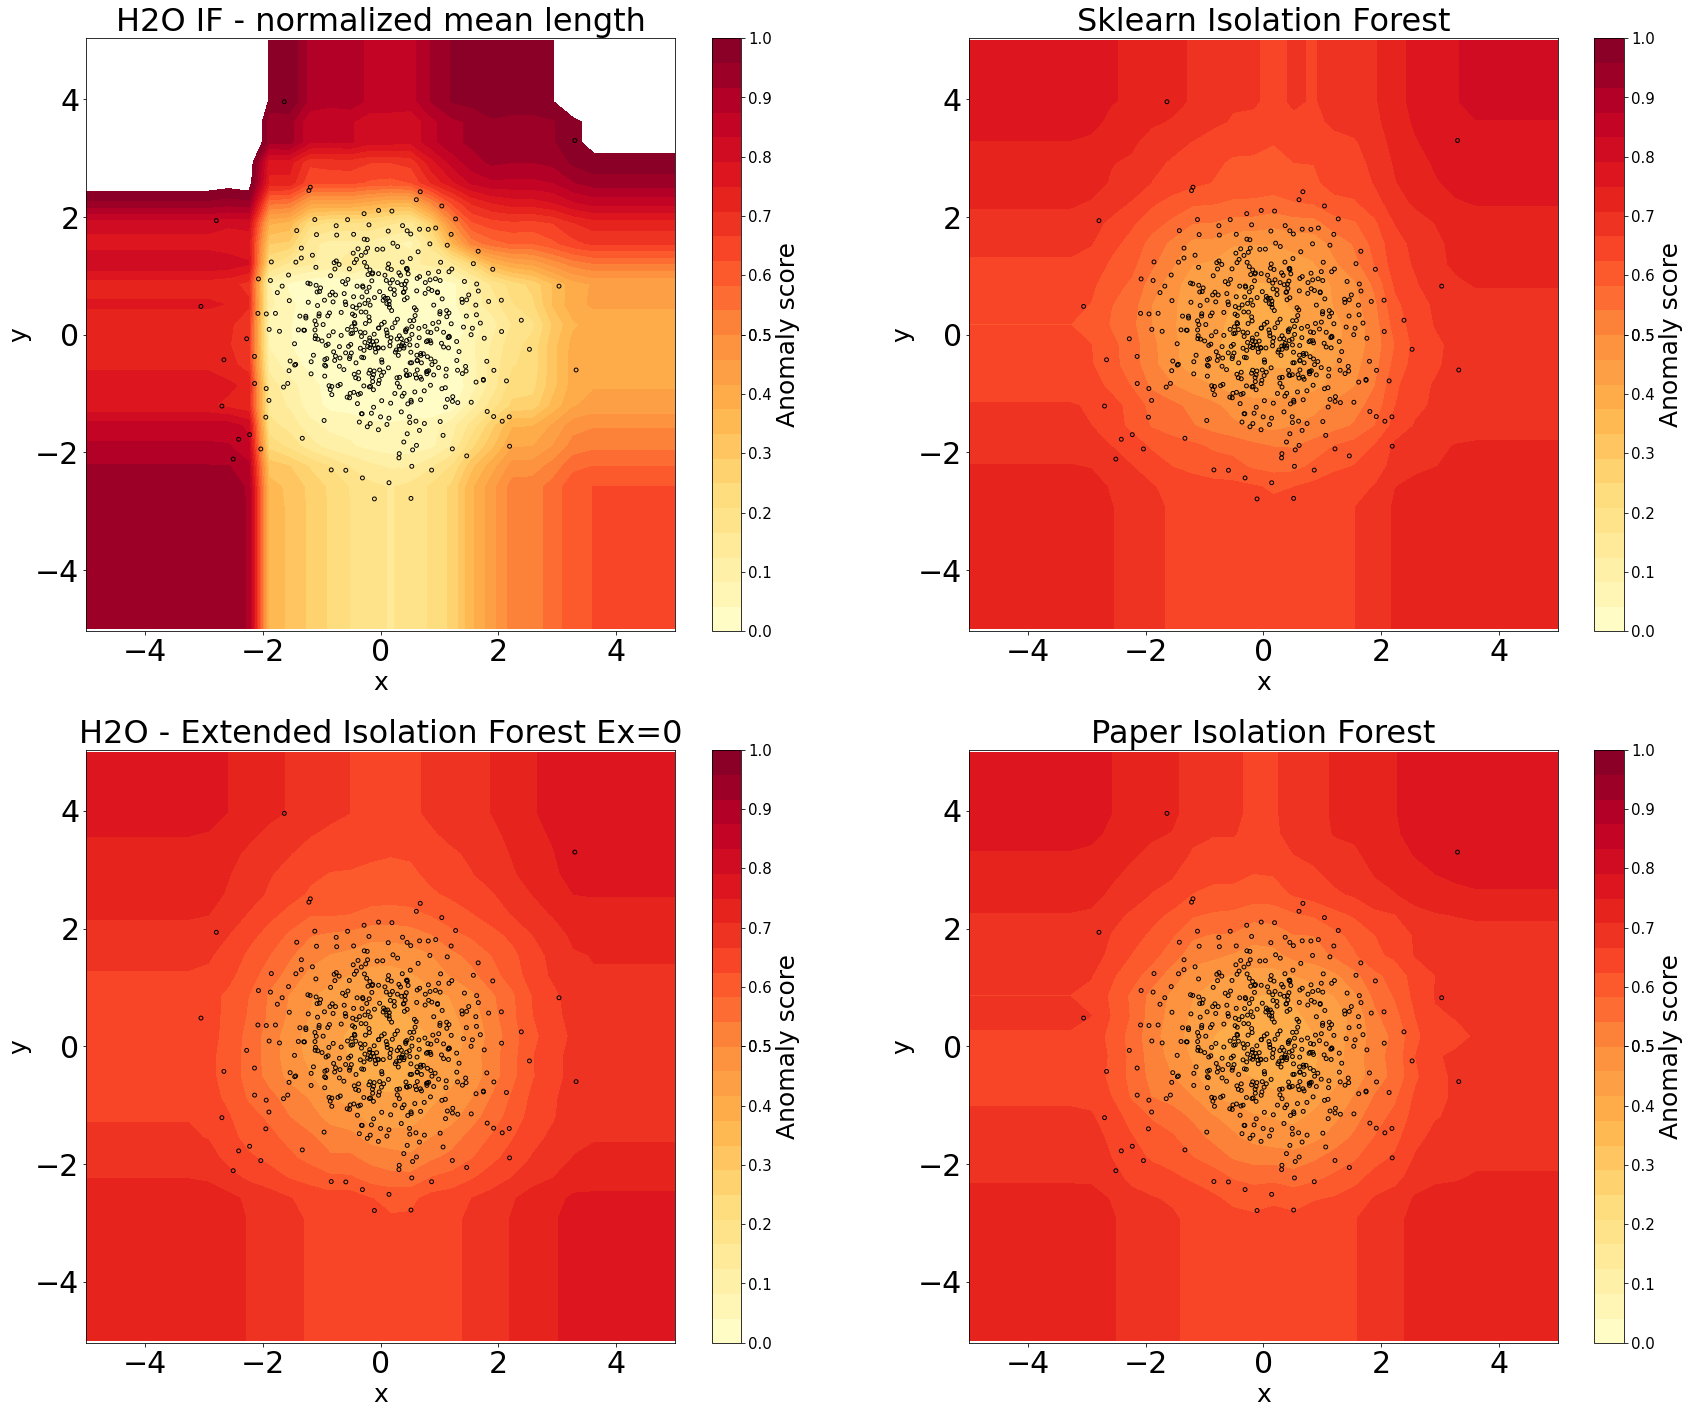

In [10]:
f = plt.figure(figsize=(29,24))

def plot_heatmap(heatmap_data, subplot, title): 

    ax1 = f.add_subplot(subplot)
    levels = np.linspace(0,1,25, endpoint=True)
    v = np.linspace(0, 1, 12, endpoint=True)
    v = np.around(v, decimals=1)
    CS = ax1.contourf(xx, yy, heatmap_data, levels, cmap=plt.cm.YlOrRd)
    cbar = plt.colorbar(CS, ticks=v)
    cbar.ax.set_ylabel('Anomaly score', fontsize = 25)
    cbar.ax.tick_params(labelsize=15)
    ax1.set_xlabel("x", fontsize = 25)
    ax1.set_ylabel("y", fontsize = 25)
    plt.tick_params(labelsize=30)
    plt.scatter(x,y,s=15,c='None',edgecolor='k')
    plt.axis("equal")
    plt.title(title,  fontsize=32)
    
plot_heatmap(heatmap_h2o_if, 221, "H2O IF - normalized mean length")
plot_heatmap(heatmap_sklearn, 222, "Sklearn Isolation Forest")
plot_heatmap(heatmap_h2o_eif_if, 223, "H2O - Extended Isolation Forest Ex=0")
plot_heatmap(heatmap_paper_if, 224, "Paper Isolation Forest")

plt.show()

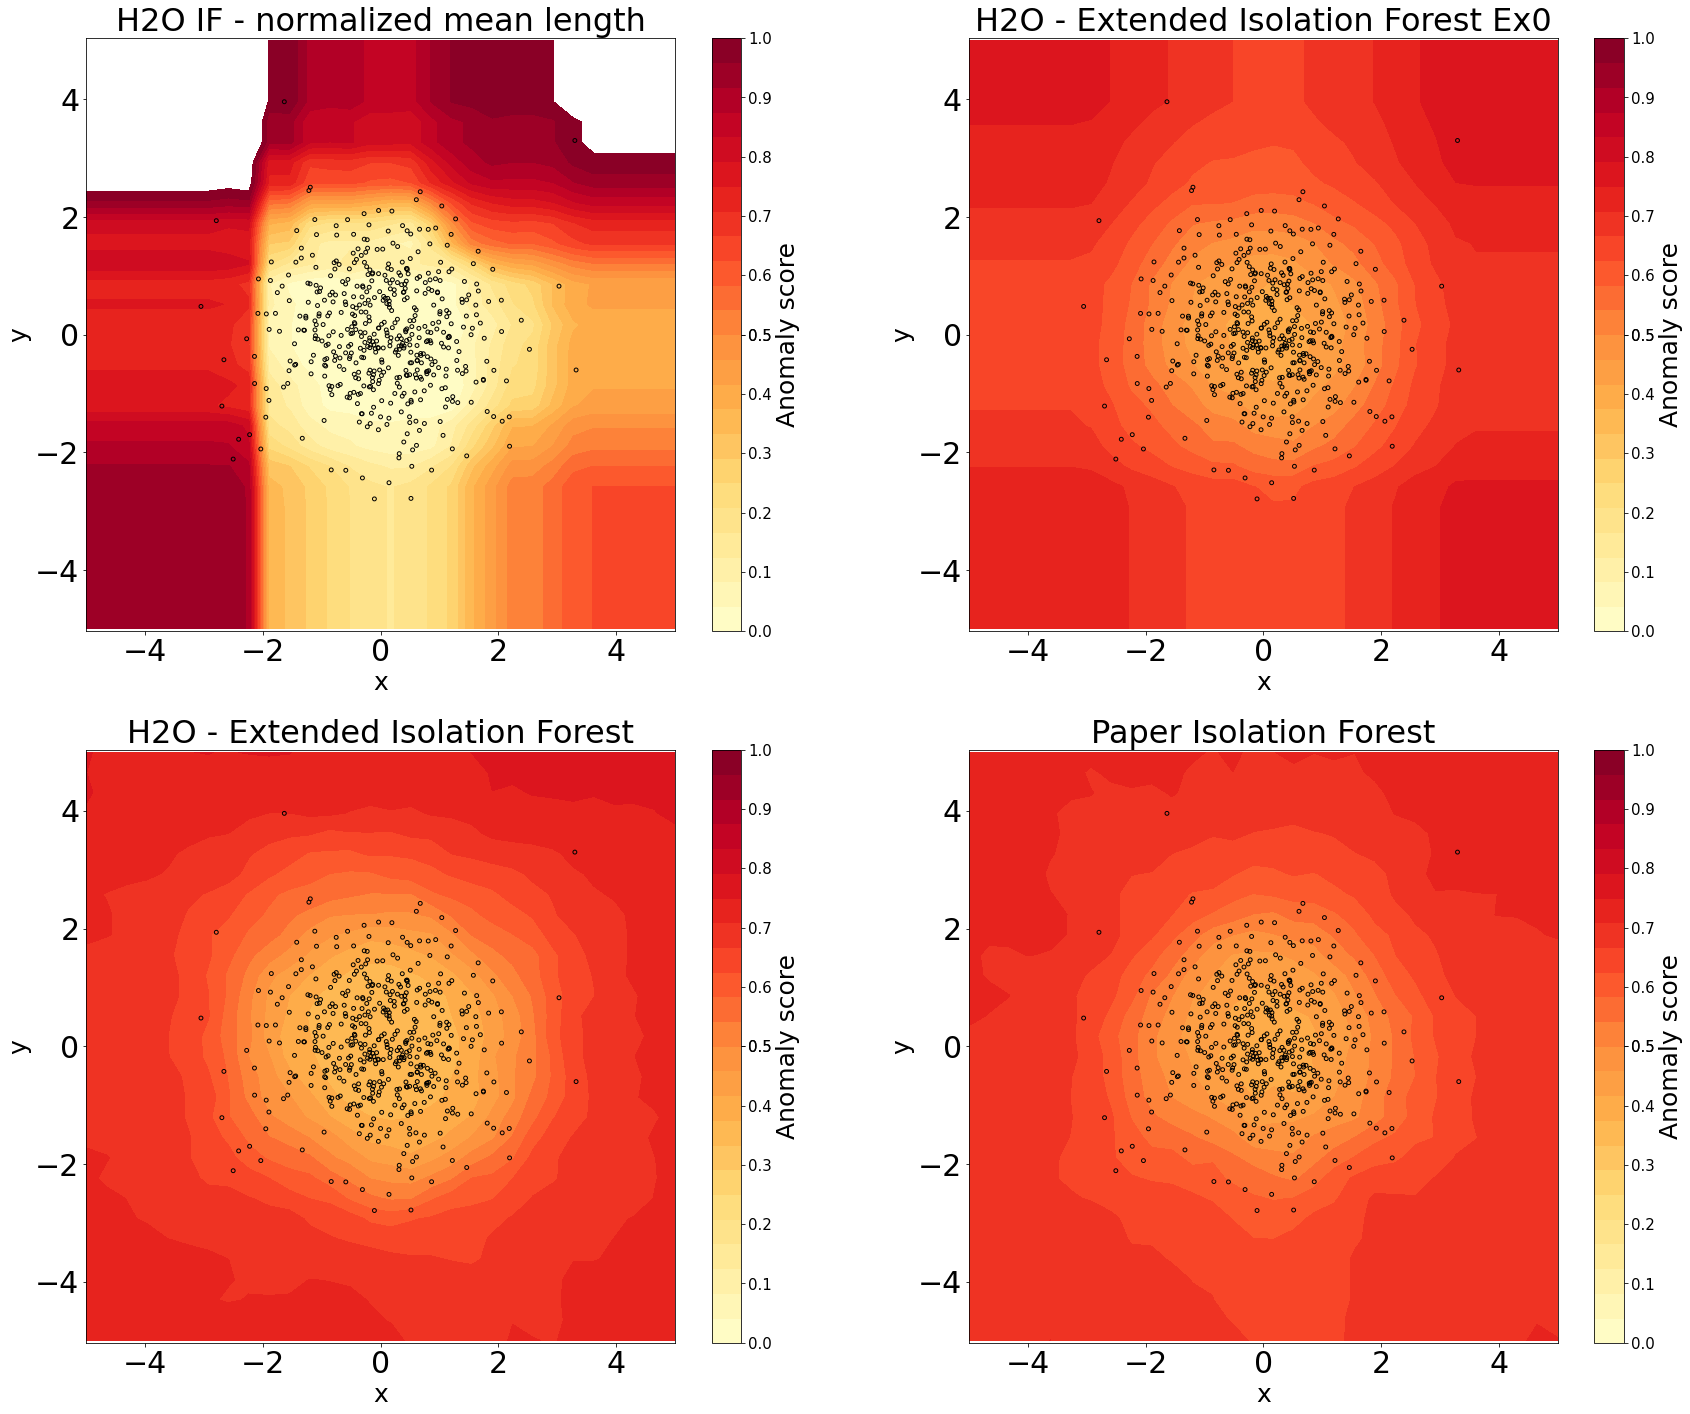

In [11]:
f = plt.figure(figsize=(29,24))
    
plot_heatmap(heatmap_h2o_if, 221, "H2O IF - normalized mean length")
plot_heatmap(heatmap_h2o_eif_if, 222, "H2O - Extended Isolation Forest Ex0")
plot_heatmap(heatmap_h2o_eif, 223, "H2O - Extended Isolation Forest")
plot_heatmap(heatmap_paper_eif, 224, "Paper Isolation Forest")

plt.show()

### Plot also H2O mean length values 

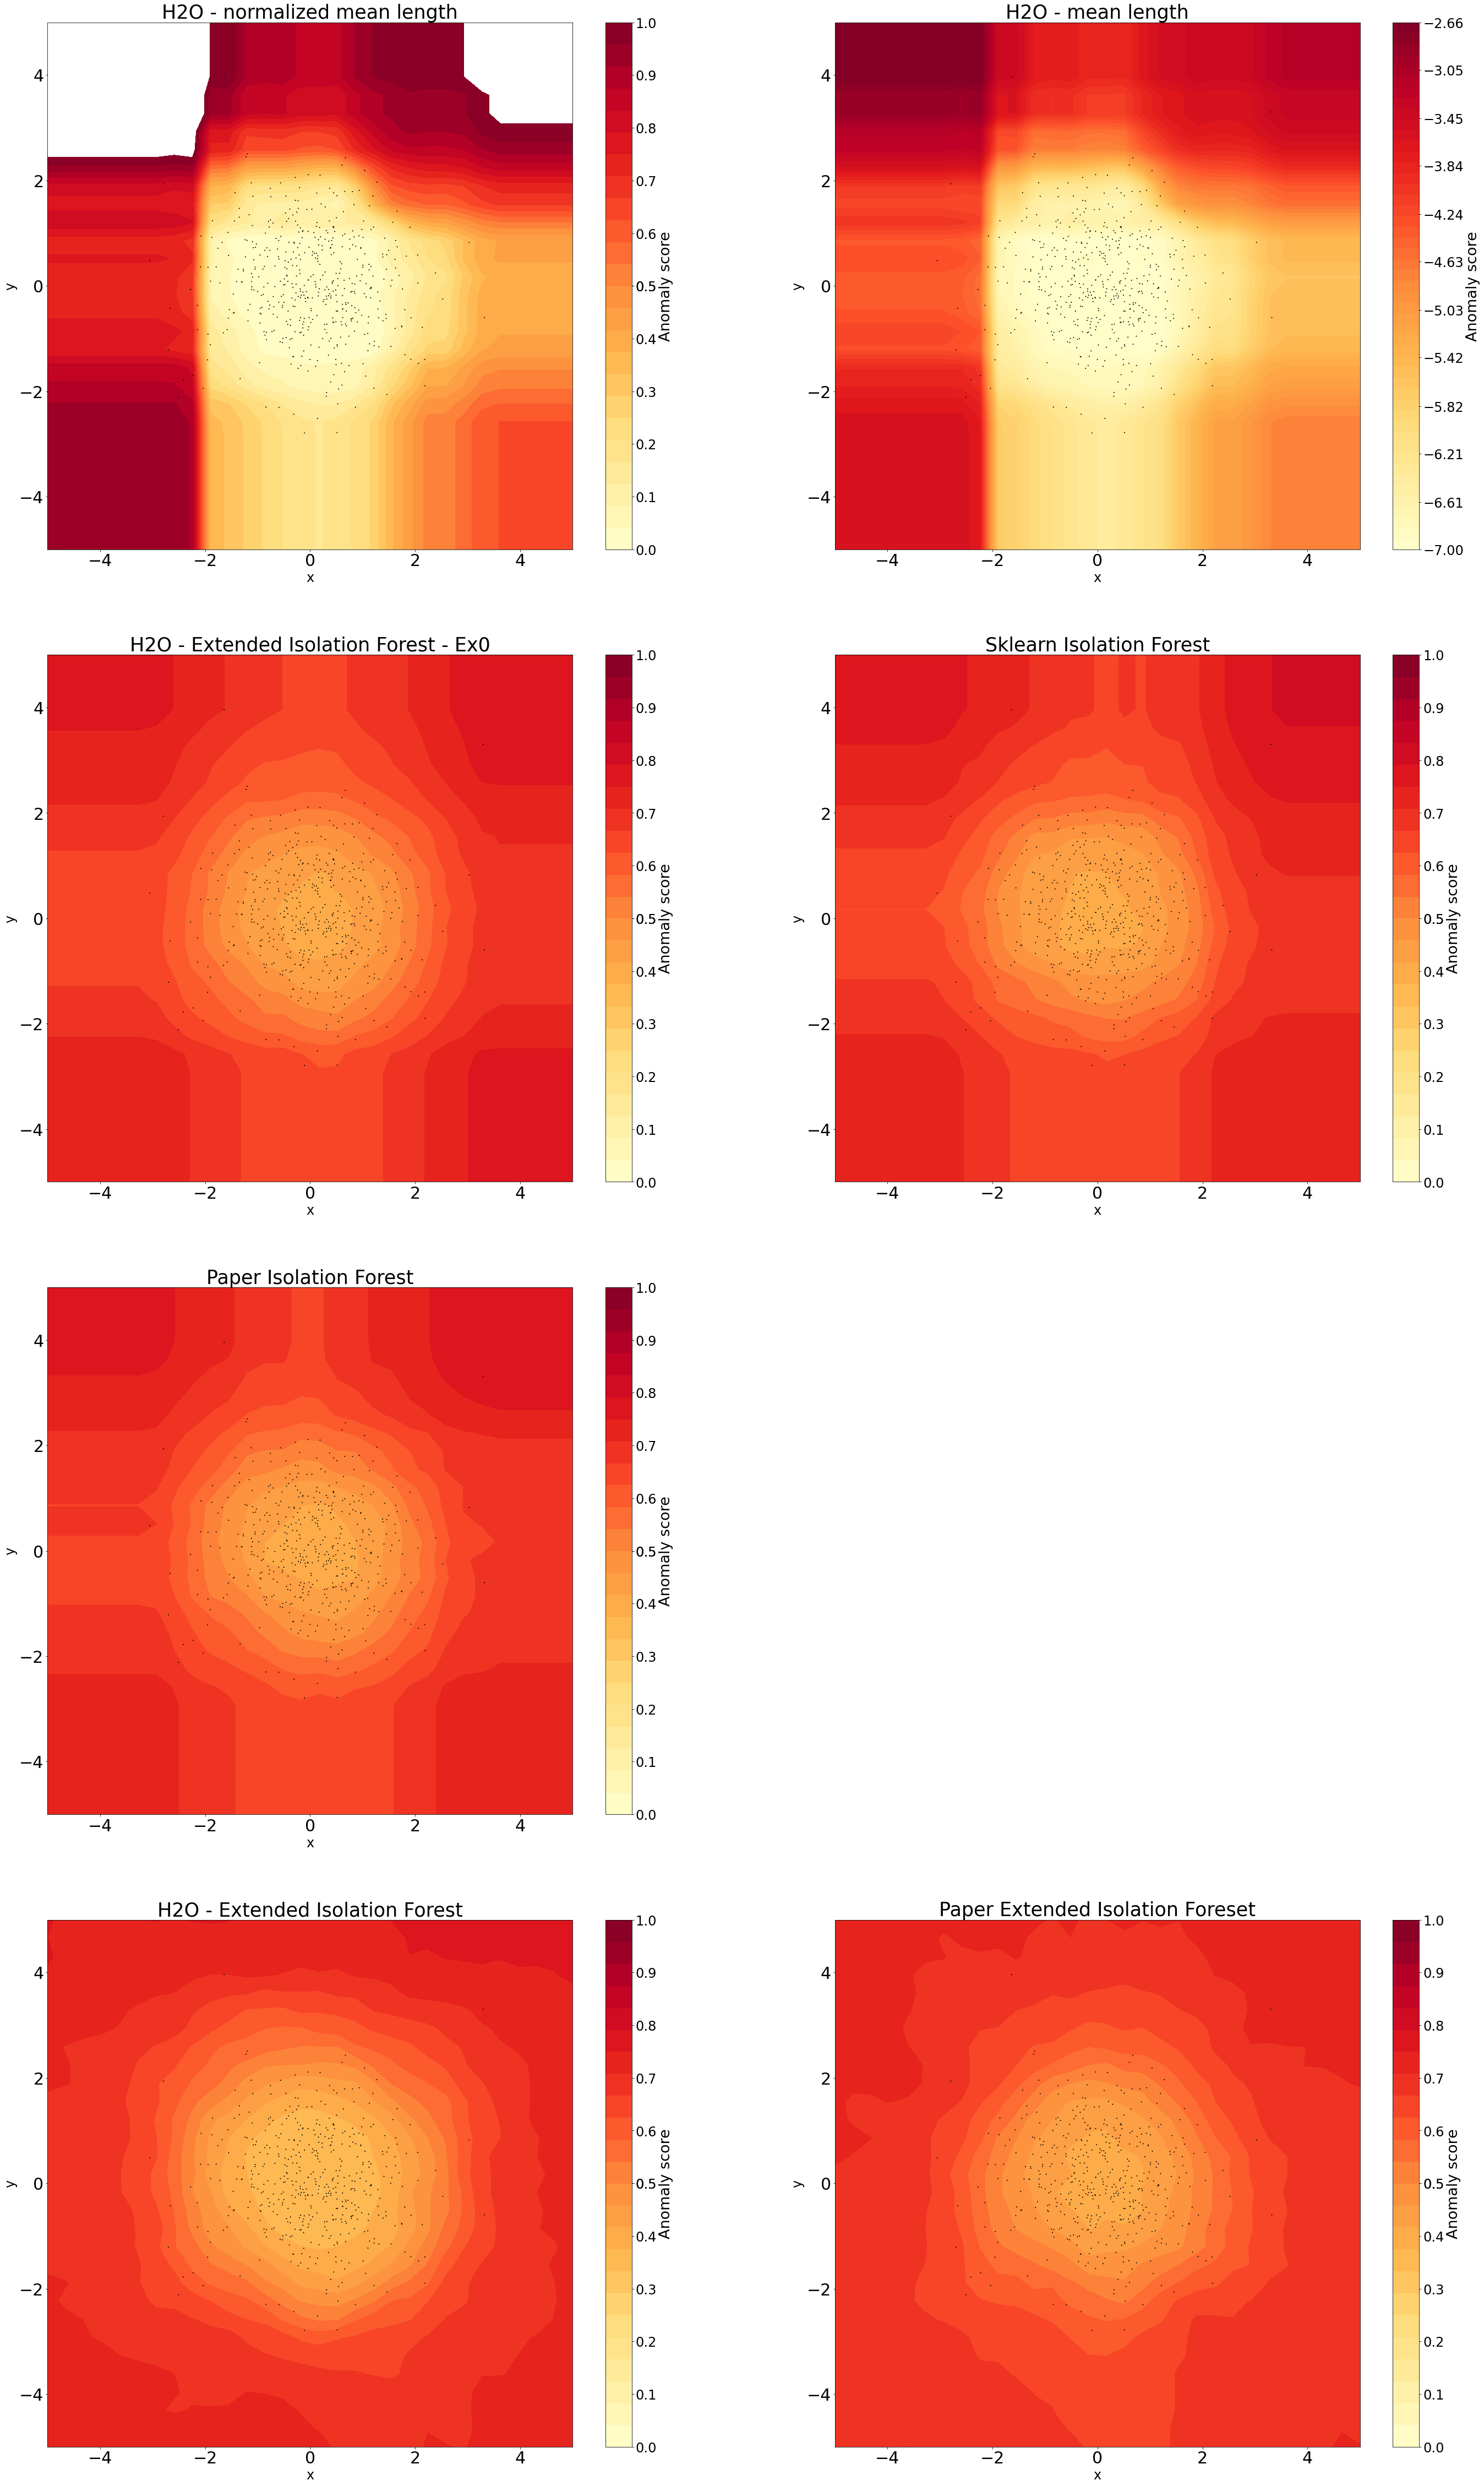

In [12]:
f = plt.figure(figsize=(47,81))

def plot_heatmap(heatmap_data, subplot, title): 

    ax1 = f.add_subplot(subplot)
    levels = np.linspace(0,1,25, endpoint=True)
    v = np.linspace(0, 1, 12, endpoint=True)
    v = np.around(v, decimals=1)
    CS = ax1.contourf(xx, yy, heatmap_data, levels, cmap=plt.cm.YlOrRd)
    cbar = plt.colorbar(CS, ticks=v)
    cbar.ax.set_ylabel('Anomaly score', fontsize = 27)
    cbar.ax.tick_params(labelsize=24)
    ax1.set_xlabel("x", fontsize = 24)
    ax1.set_ylabel("y", fontsize = 24)
    plt.tick_params(labelsize=30)
    plt.scatter(x,y,s=1,c='None',edgecolor='k')
    plt.axis("equal")
    plt.title(title,  fontsize=35)
    
# H2O
plot_heatmap(heatmap_h2o_if, 421, "H2O - normalized mean length")

# H2O - Mean length
ax1 = f.add_subplot(422)
levels = np.linspace(np.min(heatmap_h2o_mean_length_if), np.max(heatmap_h2o_mean_length_if),50, endpoint=True)
v = np.linspace(np.min(heatmap_h2o_mean_length_if), np.max(heatmap_h2o_mean_length_if),12, endpoint=True)
v = np.around(v, decimals = 2)
CS = ax1.contourf(xx, yy, heatmap_h2o_mean_length_if, levels, cmap=plt.cm.YlOrRd)
cbar = plt.colorbar(CS, ticks = v)
cbar.ax.set_ylabel('Anomaly score', fontsize = 27)
cbar.ax.tick_params(labelsize=24)
ax1.set_xlabel("x", fontsize = 24)
ax1.set_ylabel("y", fontsize = 24)
plt.tick_params(labelsize=30)
plt.scatter(x,y,s=1,c='None',edgecolor='k')
plt.axis("equal")
plt.title("H2O - mean length",  fontsize=35)

plot_heatmap(heatmap_h2o_eif_if, 423, "H2O - Extended Isolation Forest - Ex0")
plot_heatmap(heatmap_sklearn, 424, "Sklearn Isolation Forest")
plot_heatmap(heatmap_paper_if, 425, "Paper Isolation Forest")
plot_heatmap(heatmap_h2o_eif, 427, "H2O - Extended Isolation Forest")
plot_heatmap(heatmap_paper_eif, 428, "Paper Extended Isolation Foreset")

plt.show()

In [13]:
hf44 = h2o.H2OFrame([[4,4],[4,-4]], column_names = ["x", "y"]) 

predictions44 = IF_h2o.predict(hf44).cbind(hf44)
dfp44 = predictions44.as_data_frame(use_pandas=True, header=True)
dfp44

Parse progress: |█████████████████████████████████████████████████████████| 100%
isolationforest prediction progress: |████████████████████████████████████| 100%


,predict,mean_length,x,y
0,1.060942,3.17,4,4
1,0.626039,4.74,4,-4


In [14]:
# Paper EIF
paper_anomaly_score_eif = EIF_paper.compute_paths([[0,0]])
print(paper_anomaly_score_eif)
paper_anomaly_score_if = IF_paper.compute_paths([[0,0]])
print(paper_anomaly_score_if)
# print("Paper EIF anomaly scoring done")

[0.39978625]
[0.40387797]


### Conclusion

H2O implementation has inconsistent anomaly score computation to sklearn or paper. H2O anomaly score is not equally distributed as it is in others. For example point (4,4) and (4,-4) are both anomalies but their score is 
* (4, 4) - anomaly score = 1.071233, mean length = 3.09
* (4,-4) - anomaly score = 0.652055, mean length = 4.62

The gap between those two points is too large.

## References

1. Sklearn anomaly score: https://github.com/scikit-learn/scikit-learn/blob/bf24c7e3d6d768dddbfad3c26bb3f23bc82c0a18/sklearn/ensemble/_iforest.py#L463
2. Paper EIF anomaly score: https://github.com/sahandha/eif/blob/master/eif_old.py#L130
3. Paper EIF implementation: https://github.com/sahandha/eif/
4. Sklearn IF documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest.score_samples

In [15]:
h2o.cluster().shutdown()

H2O session _sid_8eb1 closed.
